## Dataset Information

Million Songs Dataset contains of two files: triplet_file and unique_tracks_file. The triplet_file contains user_id, song_id and listen time. The unique_tracks_file contains song_id, title, song_name, and artist_name. Million Songs Dataset is a mixture of song from various website with the rating that users gave after listening to the song.

There are 3 types of recommendation system: content-based, collaborative and popularity.

## What are Recommendation Systems?
Every day we view and purchase products on Amazon, browse Netflix, stream music on Spotify. Have you ever wondered how accurately they know your tastes and preferences and make Recommendations based on your interests ?

The answer is they have personalized Recommendation Engines which uses advanced algorithms to recommend products to you... When you want to watch a new movie, you usually ask your friends for suggesting movies, they know your interests and accordingly they suggest you a good movie.

So, Recommendation Systems work the same way, they are nothing but data filtering tools that uses algorithms to recommend most relevant items to a particular user.

## Importing Module

In [53]:
import numpy as np
import pandas
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
from tqdm import tqdm
import joblib
import time


## Loading the dataset

In [2]:
df=pandas.read_csv('kaggle_visible_evaluation_triplets.csv')

In [3]:
df

,user_id,song_id,count
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOBONKR12A58A7A7E0,1
1,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOEGIYH12A6D4FC0E3,1
2,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOFLJQZ12A6D4FADA6,1
3,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOHTKMO12AB01843B0,1
4,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SODQZCY12A6D4F9D11,1
...,...,...,...
1048570,90aeb21b2f36eb46d1c5d48fa030b4b8fa818b52,SOEPEVY12AB01822A1,2
1048571,90aeb21b2f36eb46d1c5d48fa030b4b8fa818b52,SOLHTJY12A58A7AFE7,1
1048572,90aeb21b2f36eb46d1c5d48fa030b4b8fa818b52,SODBAHE12A8C132D34,2
1048573,90aeb21b2f36eb46d1c5d48fa030b4b8fa818b52,SOAVWHY12AB017C6C0,3


In [4]:
df.columns

Index(['user_id', 'song_id', 'count'], dtype='object')

In [5]:
df1=pandas.read_csv('unique_tracks.csv')

In [6]:
df1

,taste_id,song_id,artist,song_name
0,TRMMMYQ128F932D901,SOQMMHC12AB0180CB8,Faster Pussy cat,Silent Night
1,TRMMMKD128F425225D,SOVFVAK12A8C1350D9,Karkkiautomaatti,Tanssi vaan
2,TRMMMRX128F93187D9,SOGTUKN12AB017F4F1,Hudson Mohawke,No One Could Ever
3,TRMMMCH128F425532C,SOBNYVR12A8C13558C,Yerba Brava,Si Vos QuerÃ©s
4,TRMMMWA128F426B589,SOHSBXH12A8C13B0DF,Der Mystic,Tangle Of Aspens
...,...,...,...,...
999995,TRYYYUS12903CD2DF0,SOTXAME12AB018F136,Kiko Navarro,O Samba Da Vida
999996,TRYYYJO128F426DA37,SOXQYIQ12A8C137FBB,Kuldeep Manak,Jago Chhadeo
999997,TRYYYMG128F4260ECA,SOHODZI12A8C137BB3,Gabriel Le Mar,Novemba
999998,TRYYYDJ128F9310A21,SOLXGOR12A81C21EB7,Elude,Faraday


## Merging both the dataset on song_id

In [7]:
df_new=pandas.merge(df,df1.drop_duplicates(['song_id']),on='song_id',how='left')

In [8]:
df_new

,user_id,song_id,count,taste_id,artist,song_name
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOBONKR12A58A7A7E0,1,TRAEHHJ12903CF492F,Dwight Yoakam,You're The One
1,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOEGIYH12A6D4FC0E3,1,TRLGMFJ128F4217DBE,Barry Tuckwell/Academy of St Martin-in-the-Fie...,Horn Concerto No. 4 in E flat K495: II. Romanc...
2,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOFLJQZ12A6D4FADA6,1,TRTNDNE128F1486812,Cartola,Tive Sim
3,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOHTKMO12AB01843B0,1,TRASTUE128F930D488,Lonnie Gordon,Catch You Baby (Steve Pitron & Max Sanna Radio...
4,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SODQZCY12A6D4F9D11,1,TRFPLWO128F1486B9E,Miguel Calo,El Cuatrero
...,...,...,...,...,...,...
1048570,90aeb21b2f36eb46d1c5d48fa030b4b8fa818b52,SOEPEVY12AB01822A1,2,TRXHJNZ128F93443A5,De Saloon,Hombre muerto
1048571,90aeb21b2f36eb46d1c5d48fa030b4b8fa818b52,SOLHTJY12A58A7AFE7,1,TREIPHK128F42626AB,Suicidal Tendencies,Go Skate! (Possessed To Skate '97)
1048572,90aeb21b2f36eb46d1c5d48fa030b4b8fa818b52,SODBAHE12A8C132D34,2,TRQEQHH12903CA6CE5,Shakira,Sombra De Ti
1048573,90aeb21b2f36eb46d1c5d48fa030b4b8fa818b52,SOAVWHY12AB017C6C0,3,TRGSVZA128F92CF92E,The Killers,Losing Touch


In [9]:
df_new.isnull().sum()

user_id      0
song_id      0
count        0
taste_id     0
artist       0
song_name    1
dtype: int64

## Basic Statistics

In [10]:
print('Total data points:',df_new.shape[0])
print('Total number of users:',df_new['user_id'].unique().shape[0])
print('Total number of songs:',df_new['song_id'].unique().shape[0])
print('Total number of tracks:',df_new['taste_id'].unique().shape[0])

Total data points: 1048575
Total number of users: 79451
Total number of songs: 142915
Total number of tracks: 142915


In [11]:
print('Number of Unique Release',df_new['song_name'].unique().shape[0])
print('Number of Unique Artist',df_new['artist'].unique().shape[0])

Number of Unique Release 121476
Number of Unique Artist 26487


In [12]:
df_new.describe()

,count
count,1.048575e+06
mean,3.181250e+00
std,7.070194e+00
min,1.000000e+00
25%,1.000000e+00
50%,1.000000e+00
75%,3.000000e+00
max,6.460000e+02


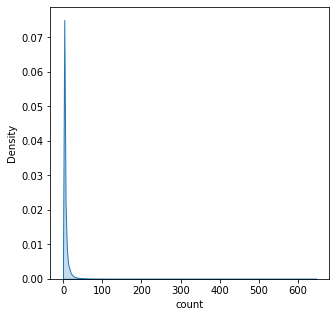

In [13]:
plt.figure(figsize=(5,5))
sns.kdeplot(df_new['count'], shade=True);

In [14]:
df_new.dtypes

user_id      object
song_id      object
count         int64
taste_id     object
artist       object
song_name    object
dtype: object

## Using the groupby

In [15]:
x=df_new.groupby(['user_id','count','song_id','taste_id'])

In [16]:
x.first()

artist  \
user_id                                  count song_id            taste_id                                     
00007a02388c208ea7176479f6ae06f8224355b3 1     SONGABP12A8C1442D4 TRPELED128F92C577D     Stone Temple Pilots   
                                               SONZGLW12A6D4FBBC1 TRFNAOK128F92F4B77              Sam Sparro   
                                               SOSPTOE12A6D4F938C TRDPXKD128F1499EF3                 Local H   
                                               SOTNDOM12AF729CADB TRGZUAD128F421CE5E              Sam Sparro   
                                               SOXMOQF12A6701FB8B TRZUWSX128F92F491A                No Doubt   
...                                                                                                      ...   
ffff07d7d9bb187aa58c7b81b3d3f35e7cf7c0ee 1     SOKTVCV12AB017E793 TRCWCYC128F9343086  Fabolous / Keri Hilson   
                                               SOUSQCN12A8C133302 TROXXYE128F4267245         Destiny's Child   
                                         2     SODKXYM12A8C1383FB TROHVOE128F4276FAB              Reni Jusis   
                                         5     SOOPDFE12A8C1386BB TRCAQLO128F4284DD0                 Kenny G   
                                         25    SOPSVIR12A8C138BB5 TRXFYCU128F4258741                 Bauhaus   

                                                                                                              song_name  
user_id                                  count song_id            taste_id                                               
00007a02388c208ea7176479f6ae06f8224355b3 1     SONGABP12A8C1442D4 TRPELED128F92C577D  Interstate Love Song (LP Version)  
                                               SONZGLW12A6D4FBBC1 TRFNAOK128F92F4B77                       Black & Gold  
                                               SOSPTOE12A6D4F938C TRDPXKD128F1499EF3                Bound For The Floor  
                                               SOTNDOM12AF729CADB TRGZUAD128F421CE5E                        Cottonmouth  
                                               SOXMOQF12A6701FB8B TRZUWSX128F92F491A                         Spiderwebs  
...                                                                                                                 ...  
ffff07d7d9bb187aa58c7b81b3d3f35e7cf7c0ee 1     SOKTVCV12AB017E793 TRCWCYC128F9343086   Everything_ Everyday_ Everywhere  
                                               SOUSQCN12A8C133302 TROXXYE128F4267245                        Say My Name  
                                         2     SODKXYM12A8C1383FB TROHVOE128F4276FAB                     Raczej Inaczej  
                                         5     SOOPDFE12A8C1386BB TRCAQLO128F4284DD0                         Tradewinds  
                                         25    SOPSVIR12A8C138BB5 TRXFYCU128F4258741                     Ziggy Stardust  

[1048575 rows x 2 columns]

In [17]:
x1=df_new.groupby(['song_id','count'])

In [18]:
x1.first()

user_id  \
song_id            count                                             
SOAAAFI12A6D4F9C66 1      d075a43b518c724d8498db70b623eda22cfd2f45   
SOAAAGK12AB0189572 2      8184aaddf11c4892fdd93fba7dc5e54f8d72eefb   
SOAAAGQ12A8C1420C8 1      0b91b7ba26eea486bcc6aee4e345cbbfe308c4a0   
                   2      4e0a4bcaa5b34b553e61cb6d795ec79d152d4c22   
                   3      89dfb6294d50df97808bacf71854bd75263b6fef   
...                                                            ...   
SOZZZPV12A8C1444B5 16     09a1e24438a7c689c31092c01f1f07fcdddc0232   
                   17     50af13d5cf3561df99480d2d2dca08ea8f4391de   
                   19     7f50bd1bc97d7cca44611fa3036ad3c130561d40   
SOZZZRV12A8C1361F1 1      9f3e83cd1438ce627fdf1f4569e5ad39d3b58bdb   
SOZZZWN12AF72A1E29 1      e56969ef30872d84ac6595521fae715ba455d067   

                                    taste_id  \
song_id            count                       
SOAAAFI12A6D4F9C66 1      TRZEXLQ128F1491D17   
SOAAAGK12AB0189572 2      TRDZUFJ12903CE29FC   
SOAAAGQ12A8C1420C8 1      TRJWZII128F92CA924   
                   2      TRJWZII128F92CA924   
                   3      TRJWZII128F92CA924   
...                                      ...   
SOZZZPV12A8C1444B5 16     TRUXMIW128F92F999F   
                   17     TRUXMIW128F92F999F   
                   19     TRUXMIW128F92F999F   
SOZZZRV12A8C1361F1 1      TRCEWAR128F425D1B6   
SOZZZWN12AF72A1E29 1      TRLAYKX128F92E728C   

                                                       artist  \
song_id            count                                        
SOAAAFI12A6D4F9C66 1      I Love You But I've Chosen Darkness   
SOAAAGK12AB0189572 2                         Au Revoir Simone   
SOAAAGQ12A8C1420C8 1                Bohren & Der Club Of Gore   
                   2                Bohren & Der Club Of Gore   
                   3                Bohren & Der Club Of Gore   
...                                                       ...   
SOZZZPV12A8C1444B5 16                      Blacks ft. P Money   
                   17                      Blacks ft. P Money   
                   19                      Blacks ft. P Money   
SOZZZRV12A8C1361F1 1                              Sangre Azul   
SOZZZWN12AF72A1E29 1                           James McMurtry   

                                 song_name  
song_id            count                    
SOAAAFI12A6D4F9C66 1      The Less You See  
SOAAAGK12AB0189572 2              Grateful  
SOAAAGQ12A8C1420C8 1             Orgelblut  
                   2             Orgelblut  
                   3             Orgelblut  
...                                    ...  
SOZZZPV12A8C1444B5 16            Fall Back  
                   17            Fall Back  
                   19            Fall Back  
SOZZZRV12A8C1361F1 1       Cuerpo A Cuerpo  
SOZZZWN12AF72A1E29 1             Peter Pan  

[331270 rows x 4 columns]

## Exploring dataset

## Analysis of user_id

In [19]:
song_grogsruped = df_new.groupby(['user_id']).agg({'count':'count'}).reset_index()
song_grogsruped.sort_values(['count'],ascending= False)

,user_id,count
39030,7d90be8dfdbde170f036ce8a4b915440137cb11c,53
4813,0f8308935bcbb9a1e04ebb7c4d41c037e5f23b90,52
14496,2e424b28bff1f62a2dae22a918f09f9c30c06d1b,52
445,016a24e91a72c159a5048ab1b9b2ba5ce761b526,52
65523,d30e18323f15426c3cdc8585252ed34459916f51,52
...,...,...
33517,6bcb76befd192b0b51898caaa2ffae1b507db95a,5
67820,da768496925a3df0986c10b634e66a3d0dcdc19d,5
33527,6bd8287b6cde35f145cfe72ea67021d61d42dc23,5
72655,ea402a1d523dba446f60ea3d4f38144322c68aa7,5


## Analysis of artist

In [20]:
artist_group = df_new.groupby(['artist']).agg({'count':'count'}).reset_index()
artist_group.sort_values('count')
artist_group.head()

,artist,count
0,!!!,72
1,!Deladap,2
2,& And Oceans,1
3,'68 Comeback,19
4,'N Sync/Phil Collins,40


In [21]:
df_new[df_new['artist']=='Coldplay']['song_name'].unique()

array(['Yellow', 'The Scientist', 'Fix You', "Don't Panic", 'Sparks',
       'Clocks', 'Life In Technicolor ii', 'Such A Rush',
       'Fix You (Live)', 'Speed Of Sound', 'Lost!',
       'God Put A Smile Upon Your Face', 'Brothers & Sisters',
       'A Rush Of Blood To The Head', 'Clocks (Live In Sydney)',
       'One I Love', 'For You', 'You Only Live Twice (Live From Norway)',
       'Shiver', 'Swallowed In The Sea', 'In My Place',
       'Postcards From Far Away', 'Glass Of Water',
       "Things I Don't Understand", 'Strawberry Swing', '42',
       'Til Kingdom Come', 'The Goldrush', 'X & Y', 'Life In Technicolor',
       'We Never Change', 'Bigger Stronger', 'What If', 'Trouble',
       "Everything's Not Lost (Includes Hidden Track 'Life Is For Living')",
       'Only Superstition', 'Politik', 'Careful Where You Stand',
       'Warning Sign', 'See You Soon', 'Spies', 'Cemeteries Of London',
       'A Whisper', 'A Message', 'Square One', 'Low', 'I Bloom Blaum',
       'I Ran Away',

In [22]:
df_new[df_new['artist']=='Justin Bieber']['song_name'].unique()

array(['Somebody To Love', 'Down To Earth', 'One Time', 'U Smile',
       'Favorite Girl', 'Love Me', 'Common Denominator',
       'Never Let You Go', 'Stuck In The Moment', 'Up',
       'One Less Lonely Girl', 'That Should Be Me', 'Bigger',
       'Runaway Love'], dtype=object)

In [23]:
artist_group['artist']

0                          !!!
1                     !Deladap
2                 & And Oceans
3                 '68 Comeback
4         'N Sync/Phil Collins
                 ...          
26482          Ã“lafur Arnalds
26483           Ã‰rika Machado
26484            Ã‰tienne Daho
26485    Ã�ngeles del Infierno
26486                     Ã�on
Name: artist, Length: 26487, dtype: object

In [24]:
artist_per_users=df_new['artist'].value_counts()
sorted_artist_per_user=artist_per_users.sort_values(ascending= False)

<AxesSubplot:xlabel='artist', ylabel='Density'>

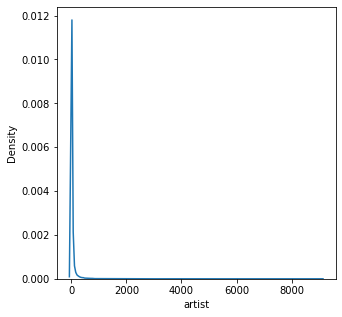

In [25]:
plt.figure(figsize=(5,5))
sns.kdeplot(x= sorted_artist_per_user, shade= False)

## Analysis of song_name

In [26]:
song_name_per_users=df_new['song_name'].value_counts()

In [27]:
song_name_per_usesrs=df_new['song_name'].value_counts().sum()

In [28]:
song_name_per_usesrs 

1048574

In [29]:
song_name_per_users.sort_values().head()

If The World Crashes Down                                            1
Come Live With Me (12'' Extended Version) (2006 Digital Remaster)    1
Upgrade U Instrumental                                               1
Seventyfive - Twentyfive                                             1
Ill Wills                                                            1
Name: song_name, dtype: int64

In [30]:
song_name_per_users.sort_values().tail(20)

Ain't Misbehavin                                                       1229
Canada                                                                 1242
ReprÃ©sente                                                            1250
The Scientist                                                          1268
SinceritÃ© Et Jalousie                                                 1301
Use Somebody                                                           1377
Marry Me                                                               1444
Catch You Baby (Steve Pitron & Max Sanna Radio Edit)                   1530
OMG                                                                    1600
Drop The World                                                         1625
Tive Sim                                                               1937
Fireflies                                                              1999
Hey_ Soul Sister                                                       2049
Horn Concert

<AxesSubplot:xlabel='song_name', ylabel='Density'>

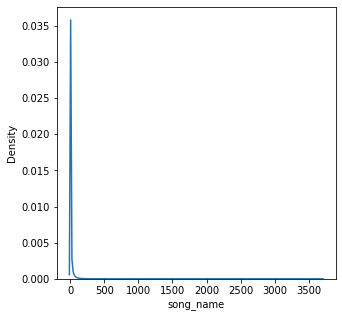

In [31]:
plt.figure(figsize=(5,5))
sns.kdeplot(song_name_per_users, shade= False)

###

In [32]:
sna = df_new.groupby(['song_name']).agg({'count':'count'}).reset_index()
sna

,song_name,count
0,Ef Ã‰g HefÃ°i Aldrei...,1
1,Light Mass Prayers,4
2,"The Arsonist Story"": Evil Craves Attention/O...",1
3,Ã‰g Ã�tti GrÃ¡a Ã†sku,4
4,(Jack The Stripper),1
...,...,...
121470,Ã�rboles Cruzados,16
121471,Ã�rboles De La Barranca,1
121472,Ã�rboles de la barranca,1
121473,Ã�rvore,3


In [33]:
grouped_sum = df_new['count'].sum()
df_new['percentage'] = (df_new['count'] / grouped_sum ) * 100
df_new.sort_values(['count', 'song_name'], ascending=False)

,user_id,song_id,count,taste_id,artist,song_name,percentage
838445,a1cc4d088600df2db42e6a305974675ffe8c905d,SOPMHHE12AB01845F6,646,TRHIOJT12903CD9C1A,The Beach Boys,What Is a Young Girl Made of,0.019366
471133,2d9ea6058d0872ccdc5b1c5c685758bb9c55f0a3,SOAOXTG12A67021AA7,597,TRAVFSL128E078E22A,Ms. Dynamite / Kymani Marley,Seed Will Grow,0.017897
642730,a86e68128c6a48d3392db22ce1151a3bdccf5fcf,SOFVLYV12A8C145D8F,537,TROSVEN128F930160B,Us3,Believe In Yourself,0.016098
363980,9d12c30de5d9975f621f95f512699989ac544410,SOFFXAQ12A8AE45C2E,535,TRUNNST12903CF45A3,Fear My Thoughts,Death Chamber,0.016038
178584,fa82c0a1a93b7c52870d7b0a004b444bbdf19401,SOCNAXF12A6D4F9B34,500,TRQNYOA128F1469E1D,Alliance Ethnik,Creil City,0.014989
...,...,...,...,...,...,...,...
345483,1e4e2b29cfa9c87ba64c777115fe7021a6f3e196,SOQOVFQ12A6D4FAE4B,1,TRUCXGV128F422BB0D,Barbara Manning,"The Arsonist Story"": Evil Craves Attention/O...",0.000030
274901,14006a947585d77ca855bb3eb439ccb8b2f857b4,SOJQJJG12A8C13396F,1,TRUEJYF128F4245FEB,Porcupine Tree,Light Mass Prayers,0.000030
716978,9816b4f28921a16924a5e9330c2e7d9226488f38,SOJQJJG12A8C13396F,1,TRUEJYF128F4245FEB,Porcupine Tree,Light Mass Prayers,0.000030
739243,2008e7351980e5f641d6c7e5deae9910792890d0,SOJQJJG12A8C13396F,1,TRUEJYF128F4245FEB,Porcupine Tree,Light Mass Prayers,0.000030


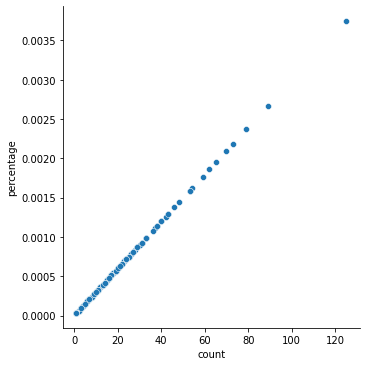

In [60]:
sns.relplot(x="count", y="percentage", data=df_new[:5000], kind="scatter");

<AxesSubplot:xlabel='percentage'>

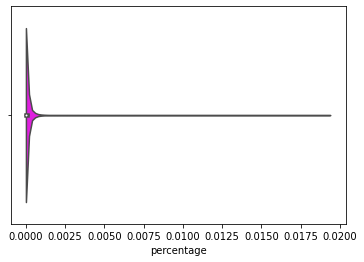

In [59]:
sns.violinplot(df_new['percentage'], orient='vertical', color='magenta')

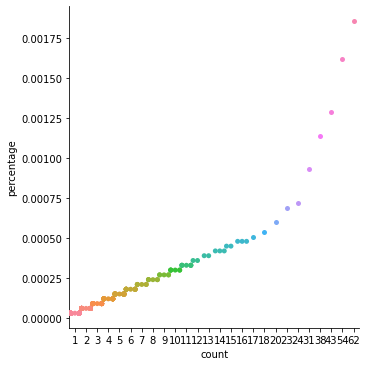

In [64]:
sns.catplot(x="count", y="percentage", kind='swarm',data=df_new[:500]);

## Create a subset of the dataset

In [34]:
song_df=df_new[1:10000]

In [35]:
len(song_df)

9999

## Count the number of unique users in the dataset

In [36]:
users = song_df['user_id'].unique()
len(users)

753

## Count the number of unique songs in the datas

In [37]:
song_df['song'] = song_df['song_name'].map(str) + " - " + song_df['artist']

In [38]:
songs = song_df['song_name'].unique()
len(songs)

7183

## Why do we need Recommendation Systems?

Internet is a vast ocean of Information, it consists of millions of items, a really large catalogue of products. There are some Users that know what they are looking for whereas others have no idea what to look for in such a large library of resources, and thus, Recommendation Systems play a vital role.

There are some products which may be really good but have not gained Popularity since they have not been advertised, so recommendation systems help such items gain popularity by bringing such items to one's notice.

It even helps in Ad Targeting- Say you're looking to buy a new laptop on Internet, your recent searches are based on laptop suggestions, and soon you'll start seeing ads on websites offering discounts on laptops. So, Ad Targeting is an advertisement technique meant to deliver ads automatically by using specialized software and algorithms that place ads depending on the user’s recent searches. Ad targeting was pegged to have secured 2.7 times as much revenue as non-targeted ads, as shown by a study conducted in 2009 by the Network Advertising Initiative.

Thus, it also helps in Increasing Revenues of the product's Organization.




## Types of recommendation systems are as follows:

1.Popularity based recommendation system

2.Collaborative recommendation system

3.Content-based recommendation system

4.emographic-based recommendation system

5.Utility-based recommendation system

6.Knowledge-based recommendation system

7.Hybrid-recommendation system

## Create a song recommender

In [39]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(song_df, test_size = 0.20, random_state=0)
print(train_data.head(5))

                                       user_id             song_id  count  \
7389  d3c75a5a579f29a3a853b3a4ba76d3a2e5243655  SOQTHZW12A8C1400F8      2   
9275  3071be7411e636fcda6c99277a5b51c45a7c4866  SODQPTQ12AF72A64BC      6   
2996  1fa6a4add6eacc3ce1aec44fc37037db2b09bf82  SOAYATB12A6701FD50      1   
5317  c8db3788ca8f60d92abf827ad59f424f05897cfc  SOGWZFC12A58A778BF      3   
357   6530c4fc41b9110de5d39fe0355fa103c66385f0  SORYRWS12AB0186CD9      2   

                taste_id                    artist  \
7389  TRGVRBA128F428E872  CCCP - Fedeli Alla Linea   
9275  TRGAXFP128F428DE85            The Budos Band   
2996  TREVCGZ128E079232A       Deep Blue Something   
5317  TRCRJXI128F425ACF2                   The Ark   
357   TRLKZES12903CD8FE2                    Finley   

                                 song_name  percentage  \
7389  Aghia Sophia (2008 Digital Remaster)     0.00006   
9275                              Scorpion     0.00018   
2996                Breakfast At Tiffa

## Popularity based recommendation system

Popularity based recommendation system works with the trend. It basically uses the items which are in trend right now. For example, if any product which is usually bought by every new user then there are chances that it may suggest that item to the user who just signed up.


## Simple popularity-based recommender class

In [40]:
import numpy as np
import pandas

#Class for Popularity based Recommender System model
#works on the listen count principle
class popularity_recommender_py():
    def __init__(self):
        self.train_data = None
        self.user_id = None
        self.item_id = None
        self.popularity_recommendations = None
        
    #Create the popularity based recommender system model
    def create(self, train_data, user_id, item_id):
        self.train_data = train_data
        self.user_id = user_id
        self.item_id = item_id

        #Get a count of user_ids for each unique song as recommendation score
        train_data_grouped = train_data.groupby([self.item_id]).agg({self.user_id: 'count'}).reset_index()
        train_data_grouped.rename(columns = {'user_id': 'score'},inplace=True)
    
        #Sort the songs based upon recommendation score
        train_data_sort = train_data_grouped.sort_values(['score', self.item_id], ascending = [0,1])
    
        #Generate a recommendation rank based upon score
        train_data_sort['Rank'] = train_data_sort['score'].rank(ascending=0, method='first')
        
        #Get the top 10 recommendations
        self.popularity_recommendations = train_data_sort.head(10)

    #Use the popularity based recommender system model to
    #make recommendations
    def recommend(self, user_id):    
        user_recommendations = self.popularity_recommendations
        
        #Add user_id column for which the recommendations are being generated
        user_recommendations['user_id'] = user_id
    
        #Bring user_id column to the front
        cols = user_recommendations.columns.tolist()
        cols = cols[-1:] + cols[:-1]
        user_recommendations = user_recommendations[cols]
        
        return user_recommendations

## Create an instance of popularity based recommender class

In [41]:
recommender_instance = popularity_recommender_py()
recommender_instance.create(train_data, 'user_id', 'song')

## Use the popularity model to make some predictions

In [42]:
user_id = users[5]
recommender_instance.recommend(user_id)

,user_id,song,score,Rank
6013,91b8fac7dc5e03f6cfaf6e2aa7171f14a8354d62,You're The One - Dwight Yoakam,33,1.0
5534,91b8fac7dc5e03f6cfaf6e2aa7171f14a8354d62,Undo - BjÃ¶rk,32,2.0
4317,91b8fac7dc5e03f6cfaf6e2aa7171f14a8354d62,Sehr kosmisch - Harmonia,29,3.0
4089,91b8fac7dc5e03f6cfaf6e2aa7171f14a8354d62,Revelry - Kings Of Leon,26,4.0
1223,91b8fac7dc5e03f6cfaf6e2aa7171f14a8354d62,Dog Days Are Over (Radio Edit) - Florence + Th...,24,5.0
1614,91b8fac7dc5e03f6cfaf6e2aa7171f14a8354d62,Fireflies - Charttraxx Karaoke,19,6.0
549,91b8fac7dc5e03f6cfaf6e2aa7171f14a8354d62,Billionaire [feat. Bruno Mars] (Explicit Albu...,18,7.0
4079,91b8fac7dc5e03f6cfaf6e2aa7171f14a8354d62,ReprÃ©sente - Alliance Ethnik,18,8.0
4309,91b8fac7dc5e03f6cfaf6e2aa7171f14a8354d62,Secrets - OneRepublic,18,9.0
2153,91b8fac7dc5e03f6cfaf6e2aa7171f14a8354d62,Horn Concerto No. 4 in E flat K495: II. Romanc...,17,10.0


## Collaborative Filtering

The idea behind collaborative filtering is to consider users’ opinions on different videos and recommend the best video to each user based on the user’s previous rankings and the opinion of other similar types of users.

## Different techniques of Collaborative filtering:
Non-probabilistic algorithm:-

1.User-based nearest neighbor.

2.Item-based nearest neighbor.

3.Reducing dimensionality.

## Build a song recommender with personalization

We now create an item similarity based collaborative filtering model that allows us to make personalized recommendations to each user.

## Class for an item similarity based personalized recommender system

In [43]:
class item_similarity_recommender_py():
    def __init__(self):
        self.train_data = None
        self.user_id = None
        self.item_id = None
        self.cooccurence_matrix = None
        self.songs_dict = None
        self.rev_songs_dict = None
        self.item_similarity_recommendations = None
        
    #Get unique items (songs) corresponding to a given user
    def get_user_items(self, user):
        user_data = self.train_data[self.train_data[self.user_id] == user]
        user_items = list(user_data[self.item_id].unique())
        
        return user_items
        
    #Get unique users for a given item (song)
    def get_item_users(self, item):
        item_data = self.train_data[self.train_data[self.item_id] == item]
        item_users = set(item_data[self.user_id].unique())
            
        return item_users
        
    #Get unique items (songs) in the training data
    def get_all_items_train_data(self):
        all_items = list(self.train_data[self.item_id].unique())
            
        return all_items
        
    #Construct cooccurence matrix
    def construct_cooccurence_matrix(self, user_songs, all_songs):
            
        ####################################
        #Get users for all songs in user_songs.
        ####################################
        user_songs_users = []        
        for i in range(0, len(user_songs)):
            user_songs_users.append(self.get_item_users(user_songs[i]))
            
        ###############################################
        #Initialize the item cooccurence matrix of size 
        #len(user_songs) X len(songs)
        ###############################################
        cooccurence_matrix = np.matrix(np.zeros(shape=(len(user_songs), len(all_songs))), float)
           
        #############################################################
        #Calculate similarity between user songs and all unique songs
        #in the training data
        #############################################################
        for i in tqdm(range(0,len(all_songs))):
            #Calculate unique listeners (users) of song (item) i
            #print(" Processing Song #"+str(i))
            songs_i_data = self.train_data[self.train_data[self.item_id] == all_songs[i]]
            users_i = set(songs_i_data[self.user_id].unique())
            
            for j in range(0,len(user_songs)):       
                    
                #Get unique listeners (users) of song (item) j
                users_j = user_songs_users[j]
                    
                #Calculate intersection of listeners of songs i and j
                users_intersection = users_i.intersection(users_j)
                
                #Calculate cooccurence_matrix[i,j] as Jaccard Index
                if len(users_intersection) != 0:
                    #Calculate union of listeners of songs i and j
                    users_union = users_i.union(users_j)
                    
                    cooccurence_matrix[j,i] = float(len(users_intersection))/float(len(users_union))
                else:
                    cooccurence_matrix[j,i] = 0
                    
        
        return cooccurence_matrix

    
    #Use the cooccurence matrix to make top recommendations
    def generate_top_recommendations(self, user, cooccurence_matrix, all_songs, user_songs):
        print("Non zero values in cooccurence_matrix :%d" % np.count_nonzero(cooccurence_matrix))
        
        #Calculate a weighted average of the scores in cooccurence matrix for all user songs.
        user_sim_scores = cooccurence_matrix.sum(axis=0)/float(cooccurence_matrix.shape[0])
        user_sim_scores = np.array(user_sim_scores)[0].tolist()
 
        #Sort the indices of user_sim_scores based upon their value
        #Also maintain the corresponding score
        sort_index = sorted(((e,i) for i,e in enumerate(list(user_sim_scores))), reverse=True)
    
        #Create a dataframe from the following
        columns = ['user_id', 'song', 'score', 'rank']
        #index = np.arange(1) # array of numbers for the number of samples
        df = pandas.DataFrame(columns=columns)
         
        #Fill the dataframe with top 10 item based recommendations
        rank = 1 
        for i in range(0,len(sort_index)):
            if ~np.isnan(sort_index[i][0]) and all_songs[sort_index[i][1]] not in user_songs and rank <= 10:
                df.loc[len(df)]=[user,all_songs[sort_index[i][1]],sort_index[i][0],rank]
                rank = rank+1
        
        #Handle the case where there are no recommendations
        if df.shape[0] == 0:
            print("The current user has no songs for training the item similarity based recommendation model.")
            return -1
        else:
            return df
 
    #Create the item similarity based recommender system model
    def create(self, train_data, user_id, item_id):
        self.train_data = train_data
        self.user_id = user_id
        self.item_id = item_id

    #Use the item similarity based recommender system model to
    #make recommendations
    def recommend(self, user):
        
        ########################################
        #A. Get all unique songs for this user
        ########################################
        user_songs = self.get_user_items(user)    
            
        print("No. of unique songs for the user: %d" % len(user_songs))
        
        ######################################################
        #B. Get all unique items (songs) in the training data
        ######################################################
        all_songs = self.get_all_items_train_data()
        
        print("no. of unique songs in the training set: %d" % len(all_songs))
         
        ###############################################
        #C. Construct item cooccurence matrix of size 
        #len(user_songs) X len(songs)
        ###############################################
        cooccurence_matrix = self.construct_cooccurence_matrix(user_songs, all_songs)
        
        #######################################################
        #D. Use the cooccurence matrix to make recommendations
        #######################################################
        df_recommendations = self.generate_top_recommendations(user, cooccurence_matrix, all_songs, user_songs)
                
        return df_recommendations
    
    #Get similar items to given items
    def get_similar_items(self, item_list):
        
        user_songs = item_list
        
        ######################################################
        #B. Get all unique items (songs) in the training data
        ######################################################
        all_songs = self.get_all_items_train_data()
        
        print("no. of unique songs in the training set: %d" % len(all_songs))
         
        ###############################################
        #C. Construct item cooccurence matrix of size 
        #len(user_songs) X len(songs)
        ###############################################
        cooccurence_matrix = self.construct_cooccurence_matrix(user_songs, all_songs)
        
        #######################################################
        #D. Use the cooccurence matrix to make recommendations
        #######################################################
        user = ""
        df_recommendations = self.generate_top_recommendations(user, cooccurence_matrix, all_songs, user_songs)
         
        return df_recommendations

## Build a song recommender with better adaptivess using collaborative recommendation.
## It is of 2 types- User Item and Item-Item

### We now create an item similarity based collaborative filtering model that allows us to make personalized recommendations to each user.

In [44]:
import random

class precision_recall_calculator():
    
    def __init__(self, test_data, train_data, pm, is_model):
        self.test_data = test_data
        self.train_data = train_data
        self.user_test_sample = None
        self.model1 = pm
        self.model2 = is_model
        
        self.ism_training_dict = dict()
        self.pm_training_dict = dict()
        self.test_dict = dict()
    
    #Method to return random percentage of values from a list
    def remove_percentage(self, list_a, percentage):
        k = int(len(list_a) * percentage)
        random.seed(0)
        indicies = random.sample(range(len(list_a)), k)
        new_list = [list_a[i] for i in indicies]
    
        return new_list
    
    #Create a test sample of users for use in calculating precision
    #and recall
    def create_user_test_sample(self, percentage):
        #Find users common between training and test set
        users_test_and_training = list(set(self.test_data['user_id'].unique()).intersection(set(self.train_data['user_id'].unique())))
        print("Length of user_test_and_training:%d" % len(users_test_and_training))

        #Take only random user_sample of users for evaluations
        self.users_test_sample = self.remove_percentage(users_test_and_training, percentage)

        print("Length of user sample:%d" % len(self.users_test_sample))
        
    #Method to generate recommendations for users in the user test sample
    def get_test_sample_recommendations(self):
        #For these test_sample users, get top 10 recommendations from training set
        #self.ism_training_dict = {}
        #self.pm_training_dict = {}

        #self.test_dict = {}

        for user_id in self.users_test_sample:
            #Get items for user_id from item similarity model
            print("Getting recommendations for user:%s" % user_id)
            user_sim_items = self.model2.recommend(user_id)
            self.ism_training_dict[user_id] = list(user_sim_items["song"])
    
            #Get items for user_id from popularity model
            user_sim_items = self.model1.recommend(user_id)
            self.pm_training_dict[user_id] = list(user_sim_items["song"])
    
            #Get items for user_id from test_data
            test_data_user = self.test_data[self.test_data['user_id'] == user_id]
            self.test_dict[user_id] = set(test_data_user['song'].unique() )
    
    #Method to calculate the precision and recall measures
    def calculate_precision_recall(self):
        #Create cutoff list for precision and recall calculation
        cutoff_list = list(range(1,11))


        #For each distinct cutoff:
        #    1. For each distinct user, calculate precision and recall.
        #    2. Calculate average precision and recall.

        ism_avg_precision_list = []
        ism_avg_recall_list = []
        pm_avg_precision_list = []
        pm_avg_recall_list = []


        num_users_sample = len(self.users_test_sample)
        for N in cutoff_list:
            ism_sum_precision = 0
            ism_sum_recall = 0
            pm_sum_precision = 0
            pm_sum_recall = 0
            ism_avg_precision = 0
            ism_avg_recall = 0
            pm_avg_precision = 0
            pm_avg_recall = 0

            for user_id in self.users_test_sample:
                ism_hitset = self.test_dict[user_id].intersection(set(self.ism_training_dict[user_id][0:N]))
                pm_hitset = self.test_dict[user_id].intersection(set(self.pm_training_dict[user_id][0:N]))
                testset = self.test_dict[user_id]
        
                pm_sum_precision += float(len(pm_hitset))/float(N)
                pm_sum_recall += float(len(pm_hitset))/float(len(testset))

                ism_sum_precision += float(len(ism_hitset))/float(len(testset))
                ism_sum_recall += float(len(ism_hitset))/float(N)
        
            pm_avg_precision = pm_sum_precision/float(num_users_sample)
            pm_avg_recall = pm_sum_recall/float(num_users_sample)
    
            ism_avg_precision = ism_sum_precision/float(num_users_sample)
            ism_avg_recall = ism_sum_recall/float(num_users_sample)

            ism_avg_precision_list.append(ism_avg_precision)
            ism_avg_recall_list.append(ism_avg_recall)
    
            pm_avg_precision_list.append(pm_avg_precision)
            pm_avg_recall_list.append(pm_avg_recall)
            
        return (pm_avg_precision_list, pm_avg_recall_list, ism_avg_precision_list, ism_avg_recall_list)
     

    #A wrapper method to calculate all the evaluation measures
    def calculate_measures(self, percentage):
        #Create a test sample of users
        self.create_user_test_sample(percentage)
        
        #Generate recommendations for the test sample users
        self.get_test_sample_recommendations()
        
        #Calculate precision and recall at different cutoff values
        #for popularity mode (pm) as well as item similarity model (ism)
        
        return self.calculate_precision_recall()
        #return (pm_avg_precision_list, pm_avg_recall_list, ism_avg_precision_list, ism_avg_recall_list)


## Use the item similarity based recommender model to make some predictions

In [45]:
#Creating an instance of the item-item collaborative recommendation module

is_model = item_similarity_recommender_py()
is_model.create(train_data, 'user_id', 'song')

#using training data to make some recommendations
#Print the song_names for the user in training data
user_id = users[5]
user_items = is_model.get_user_items(user_id)
#
print("------------------------------------------------------------------------------------")
print("Training data song_names for the user userid: %s:" % user_id)
print("------------------------------------------------------------------------------------")

for user_item in user_items:
    print(user_item)

print("----------------------------------------------------------------------")
print("Recommendation process going on:")
print("----------------------------------------------------------------------")

#Recommend song_names for the user using personalized model
is_model.recommend(user_id)

  1%|█                                                                              | 79/6072 [00:00<00:08, 734.34it/s]

------------------------------------------------------------------------------------
Training data song_names for the user userid: 91b8fac7dc5e03f6cfaf6e2aa7171f14a8354d62:
------------------------------------------------------------------------------------
Love Letters - Dario Marianelli
Pastorale - Secret Garden
In The Waiting Line - Zero 7
Until The Morning - Thievery Corporation
The Richest Man In Babylon - Thievery Corporation
Un Simple Histoire - Thievery Corporation
Big Yellow Taxi - Counting Crows / Vanessa Carlton
Kryptonite - 3 Doors Down
Passacaglia - Secret Garden
Illumination - Secret Garden
----------------------------------------------------------------------
Recommendation process going on:
----------------------------------------------------------------------
No. of unique songs for the user: 10
no. of unique songs in the training set: 6072


100%|████████████████████████████████████████████████████████████████████████████| 6072/6072 [00:06<00:00, 1009.66it/s]


Non zero values in cooccurence_matrix :179


,user_id,song,score,rank
0,91b8fac7dc5e03f6cfaf6e2aa7171f14a8354d62,Summer Long - Kathleen Edwards,0.05,1
1,91b8fac7dc5e03f6cfaf6e2aa7171f14a8354d62,To Have And To Hold - Deftones,0.05,2
2,91b8fac7dc5e03f6cfaf6e2aa7171f14a8354d62,Monster - Kevin Blechdom,0.05,3
3,91b8fac7dc5e03f6cfaf6e2aa7171f14a8354d62,Muevan Las Industrias (remix) - Los Prisioneros,0.05,4
4,91b8fac7dc5e03f6cfaf6e2aa7171f14a8354d62,Hate (I Really Don't Like You) - Plain White T's,0.05,5
5,91b8fac7dc5e03f6cfaf6e2aa7171f14a8354d62,Intro - Horkyze Slyze,0.05,6
6,91b8fac7dc5e03f6cfaf6e2aa7171f14a8354d62,Approach the Throne - Clues,0.05,7
7,91b8fac7dc5e03f6cfaf6e2aa7171f14a8354d62,Alison Statton - Pants Yell!,0.05,8
8,91b8fac7dc5e03f6cfaf6e2aa7171f14a8354d62,Frantic - The Lovely Feathers,0.05,9
9,91b8fac7dc5e03f6cfaf6e2aa7171f14a8354d62,Intro (Album Version) - Within Temptation,0.05,10


In [46]:

start = time.time()

#Define what percentage of users to use for precision recall calculation
user_sample = 0.05

#Instantiate the precision_recall_calculator class
pr = precision_recall_calculator(test_data, train_data, recommender_instance, is_model)

#Call method to calculate precision and recall values
(pm_avg_precision_list, pm_avg_recall_list, ism_avg_precision_list, ism_avg_recall_list) = pr.calculate_measures(user_sample)

end = time.time()
print(end - start)

  0%|                                                                                         | 0/6072 [00:00<?, ?it/s]

Length of user_test_and_training:665
Length of user sample:33
Getting recommendations for user:9bafadb4f8e8b1011bd9af3984821822555b9916
No. of unique songs for the user: 5
no. of unique songs in the training set: 6072


  2%|█▎                                                                            | 100/6072 [00:00<00:06, 956.20it/s]

Non zero values in cooccurence_matrix :112
Getting recommendations for user:9092d70b9bd0dbe98eba41eaf1f7a083cb982956
No. of unique songs for the user: 16
no. of unique songs in the training set: 6072


  1%|█                                                                              | 83/6072 [00:00<00:07, 783.97it/s]

Non zero values in cooccurence_matrix :534
Getting recommendations for user:4c71c3fd3fe4a33faff1b0313ad7a63a8b04b0a3
No. of unique songs for the user: 5
no. of unique songs in the training set: 6072


  2%|█▎                                                                           | 107/6072 [00:00<00:05, 1023.04it/s]

Non zero values in cooccurence_matrix :545
Getting recommendations for user:ec97db904e345c25db5ce265e34b62f60a961752
No. of unique songs for the user: 11
no. of unique songs in the training set: 6072


  0%|                                                                                         | 0/6072 [00:00<?, ?it/s]

Non zero values in cooccurence_matrix :267
Getting recommendations for user:e4332e11f4df6dd26673bb6b085e9a2bbdc9b8a5
No. of unique songs for the user: 25
no. of unique songs in the training set: 6072


  2%|█▎                                                                            | 107/6072 [00:00<00:06, 984.29it/s]

Non zero values in cooccurence_matrix :1950
Getting recommendations for user:5c55f6e9b0f88600df3683e510a6153e1cbc5b29
No. of unique songs for the user: 3
no. of unique songs in the training set: 6072


  2%|█▏                                                                             | 93/6072 [00:00<00:06, 855.14it/s]

Non zero values in cooccurence_matrix :9
Getting recommendations for user:f637edca196c9017f60ae89fb0ca0b855c47c9d6
No. of unique songs for the user: 17
no. of unique songs in the training set: 6072


  2%|█▎                                                                            | 101/6072 [00:00<00:06, 987.42it/s]

Non zero values in cooccurence_matrix :767
Getting recommendations for user:be581a4302a0d6d0431478b1ddb3550f3263ea07
No. of unique songs for the user: 6
no. of unique songs in the training set: 6072


  1%|█▏                                                                             | 88/6072 [00:00<00:07, 826.59it/s]

Non zero values in cooccurence_matrix :53
Getting recommendations for user:604d906f3fd40383e39c2b75fb6e90f8ee742ca7
No. of unique songs for the user: 19
no. of unique songs in the training set: 6072


  2%|█▎                                                                           | 104/6072 [00:00<00:05, 1013.08it/s]

Non zero values in cooccurence_matrix :940
Getting recommendations for user:51e09f874aa261fc8106a091bb2ae21eca3cbcf3
No. of unique songs for the user: 4
no. of unique songs in the training set: 6072


  0%|                                                                                         | 0/6072 [00:00<?, ?it/s]

Non zero values in cooccurence_matrix :37
Getting recommendations for user:02caaa0349f5d7aa54a6a262308a4ada43ad46d2
No. of unique songs for the user: 16
no. of unique songs in the training set: 6072


  2%|█▎                                                                           | 106/6072 [00:00<00:05, 1053.05it/s]

Non zero values in cooccurence_matrix :728
Getting recommendations for user:84668b6bcdec3b60f628098fb08c1523c0288da2
No. of unique songs for the user: 23
no. of unique songs in the training set: 6072


  1%|█▏                                                                             | 91/6072 [00:00<00:07, 830.30it/s]

Non zero values in cooccurence_matrix :919
Getting recommendations for user:ccd845ba00f167bf8679d3eb7569d09e5ea483be
No. of unique songs for the user: 9
no. of unique songs in the training set: 6072


  2%|█▎                                                                             | 97/6072 [00:00<00:06, 951.30it/s]

Non zero values in cooccurence_matrix :125
Getting recommendations for user:3d4c7177b28d3373bf2eaec99f7911656831aa47
No. of unique songs for the user: 7
no. of unique songs in the training set: 6072


  1%|▋                                                                              | 52/6072 [00:00<00:12, 481.40it/s]

Non zero values in cooccurence_matrix :71
Getting recommendations for user:f0b926ce5dff28c33f401fd7228a113487549325
No. of unique songs for the user: 4
no. of unique songs in the training set: 6072


  2%|█▎                                                                             | 97/6072 [00:00<00:06, 912.62it/s]

Non zero values in cooccurence_matrix :36
Getting recommendations for user:373ecbeb61e43aebef7ef8bdb86d58c041d478bf
No. of unique songs for the user: 8
no. of unique songs in the training set: 6072


  2%|█▎                                                                           | 102/6072 [00:00<00:05, 1008.24it/s]

Non zero values in cooccurence_matrix :725
Getting recommendations for user:df6c80e9948ffb8834cef0b06f982620d349466a
No. of unique songs for the user: 12
no. of unique songs in the training set: 6072


  2%|█▏                                                                             | 95/6072 [00:00<00:06, 910.21it/s]

Non zero values in cooccurence_matrix :144
Getting recommendations for user:3adc254a2cf430b188a90953bba2617404fffe59
No. of unique songs for the user: 7
no. of unique songs in the training set: 6072


  1%|█▏                                                                             | 87/6072 [00:00<00:06, 869.69it/s]

Non zero values in cooccurence_matrix :82
Getting recommendations for user:e9ceed8108b26a73b32c4e966215dc5f3300a030
No. of unique songs for the user: 12
no. of unique songs in the training set: 6072


  2%|█▏                                                                             | 93/6072 [00:00<00:07, 852.79it/s]

Non zero values in cooccurence_matrix :1071
Getting recommendations for user:4c89de9c1a7698b7539e547de9259764df3f0285
No. of unique songs for the user: 11
no. of unique songs in the training set: 6072


  2%|█▎                                                                            | 105/6072 [00:00<00:06, 988.43it/s]

Non zero values in cooccurence_matrix :207
Getting recommendations for user:fee1f31d583cb7e79b217661dc40f287bf65a13e
No. of unique songs for the user: 8
no. of unique songs in the training set: 6072


  0%|                                                                                         | 0/6072 [00:00<?, ?it/s]

Non zero values in cooccurence_matrix :117
Getting recommendations for user:8081748f91ad11953a86aa50bb6a8d0c9b3f8f47
No. of unique songs for the user: 6
no. of unique songs in the training set: 6072


  1%|█▏                                                                             | 91/6072 [00:00<00:06, 907.69it/s]

Non zero values in cooccurence_matrix :114
Getting recommendations for user:872e28642fcbb548a44ee9c23ec98cd0fbbc600f
No. of unique songs for the user: 7
no. of unique songs in the training set: 6072


  0%|                                                                                         | 0/6072 [00:00<?, ?it/s]

Non zero values in cooccurence_matrix :245
Getting recommendations for user:770bd4770ef79a04e20f298c31bcff7d5cecfcdc
No. of unique songs for the user: 14
no. of unique songs in the training set: 6072


  1%|█                                                                              | 78/6072 [00:00<00:07, 772.04it/s]

Non zero values in cooccurence_matrix :821
Getting recommendations for user:026b3e52b951d2f091b975cc10e4846e36a33baa
No. of unique songs for the user: 11
no. of unique songs in the training set: 6072


  2%|█▏                                                                             | 95/6072 [00:00<00:06, 937.74it/s]

Non zero values in cooccurence_matrix :291
Getting recommendations for user:f19c67ce150ee2c606533a956f22ae6811fc3af0
No. of unique songs for the user: 6
no. of unique songs in the training set: 6072


  2%|█▎                                                                             | 97/6072 [00:00<00:06, 934.35it/s]

Non zero values in cooccurence_matrix :279
Getting recommendations for user:5e42837bcbbfd9c103483e924daf302f41d1d559
No. of unique songs for the user: 8
no. of unique songs in the training set: 6072


  2%|█▎                                                                            | 100/6072 [00:00<00:06, 983.02it/s]

Non zero values in cooccurence_matrix :305
Getting recommendations for user:d6d0c7632cf83f30c03f196fba1a157793fbaa96
No. of unique songs for the user: 7
no. of unique songs in the training set: 6072


  2%|█▎                                                                            | 102/6072 [00:00<00:06, 972.83it/s]

Non zero values in cooccurence_matrix :125
Getting recommendations for user:cf74ad53beb32f5a7f96b3e5d8f1e21eda6cdbca
No. of unique songs for the user: 6
no. of unique songs in the training set: 6072


  2%|█▎                                                                            | 100/6072 [00:00<00:06, 964.21it/s]

Non zero values in cooccurence_matrix :36
Getting recommendations for user:9ef1f1f741626c63da7686f39de2f17459cf9e3d
No. of unique songs for the user: 7
no. of unique songs in the training set: 6072


  2%|█▎                                                                           | 101/6072 [00:00<00:05, 1003.15it/s]

Non zero values in cooccurence_matrix :54
Getting recommendations for user:ecec8486bdc14046d87c2fd4a850251b944bea01
No. of unique songs for the user: 17
no. of unique songs in the training set: 6072


  2%|█▎                                                                           | 104/6072 [00:00<00:05, 1022.16it/s]

Non zero values in cooccurence_matrix :350
Getting recommendations for user:cc9d1b7883123f703247a3376023838269acb7b0
No. of unique songs for the user: 14
no. of unique songs in the training set: 6072


  2%|█▎                                                                           | 105/6072 [00:00<00:05, 1008.14it/s]

Non zero values in cooccurence_matrix :579
Getting recommendations for user:6e6b836e0a82b8d77865041d83f6b35bcc491f36
No. of unique songs for the user: 2
no. of unique songs in the training set: 6072


100%|████████████████████████████████████████████████████████████████████████████| 6072/6072 [00:05<00:00, 1042.50it/s]

Non zero values in cooccurence_matrix :11
204.52300477027893


## Use the above precision recall calculator class to calculate the evaluation measures

In [47]:
import pylab as pl

#Method to generate precision and recall curve
def plot_precision_recall(m1_precision_list, m1_recall_list, m1_label, m2_precision_list, m2_recall_list, m2_label):
    pl.clf()    
    pl.plot(m1_recall_list, m1_precision_list, label=m1_label)
    pl.plot(m2_recall_list, m2_precision_list, label=m2_label)
    pl.xlabel('Recall')
    pl.ylabel('Precision')
    pl.ylim([0.0, 0.20])
    pl.xlim([0.0, 0.20])
    pl.title('Precision-Recall curve')
    #pl.legend(loc="upper right")
    pl.legend(loc=9, bbox_to_anchor=(0.5, -0.2))
    pl.show()

## Code to plot precision recall curve

In [48]:
import pylab as pl

#Method to generate precision and recall curve
def plot_precision_recall(m1_precision_list, m1_recall_list, m1_label, m2_precision_list, m2_recall_list, m2_label):
    pl.clf()    
    pl.plot(m1_recall_list, m1_precision_list, label=m1_label)
    pl.plot(m2_recall_list, m2_precision_list, label=m2_label)
    pl.xlabel('Recall')
    pl.ylabel('Precision')
    pl.ylim([0.0, 0.20])
    pl.xlim([0.0, 0.20])
    pl.title('Precision-Recall curve')
    #pl.legend(loc="upper right")
    pl.legend(loc=9, bbox_to_anchor=(0.5, -0.2))
    pl.show()

Plotting precision recall curves.


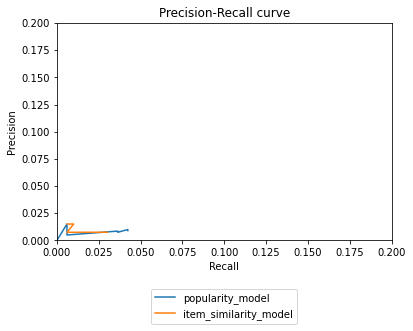

In [49]:
print("Plotting precision recall curves.")

plot_precision_recall(pm_avg_precision_list, pm_avg_recall_list, "popularity_model",
                      ism_avg_precision_list, ism_avg_recall_list, "item_similarity_model")

# CONTENT BASED

In [56]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [57]:
print("Number of null values \n{}.".format(df_new.isnull().sum()))

Number of null values 
user_id         0
song_id         0
count           0
taste_id        0
artist          0
song_name       1
percentage      0
song_feature    1
dtype: int64.


In [58]:
df_new=df_new.dropna()

In [59]:
print("Number of null values \n{}.".format(df_new.isnull().sum()))

Number of null values 
user_id         0
song_id         0
count           0
taste_id        0
artist          0
song_name       0
percentage      0
song_feature    0
dtype: int64.


In [60]:
df2=df_new.head(10000)

In [61]:
df2

,user_id,song_id,count,taste_id,artist,song_name,percentage,song_feature
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOBONKR12A58A7A7E0,1,TRAEHHJ12903CF492F,Dwight Yoakam,You're The One,0.00003,Dwight Yoakam You're The One
1,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOEGIYH12A6D4FC0E3,1,TRLGMFJ128F4217DBE,Barry Tuckwell/Academy of St Martin-in-the-Fie...,Horn Concerto No. 4 in E flat K495: II. Romanc...,0.00003,Barry Tuckwell/Academy of St Martin-in-the-Fie...
2,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOFLJQZ12A6D4FADA6,1,TRTNDNE128F1486812,Cartola,Tive Sim,0.00003,Cartola Tive Sim
3,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOHTKMO12AB01843B0,1,TRASTUE128F930D488,Lonnie Gordon,Catch You Baby (Steve Pitron & Max Sanna Radio...,0.00003,Lonnie Gordon Catch You Baby (Steve Pitron & M...
4,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SODQZCY12A6D4F9D11,1,TRFPLWO128F1486B9E,Miguel Calo,El Cuatrero,0.00003,Miguel Calo El Cuatrero
...,...,...,...,...,...,...,...,...
9995,4e7abd655b2d28d772b20cbc912f3bdd542229d7,SOCKSGZ12A58A7CA4B,2,TRQTLTB128F92F785B,Linkin Park,Bleed It Out [Live At Milton Keynes],0.00006,Linkin Park Bleed It Out [Live At Milton Keynes]
9996,4e7abd655b2d28d772b20cbc912f3bdd542229d7,SOQLUTQ12A8AE48037,1,TRTEGUJ128F425B7D3,Foo Fighters,The Pretender,0.00003,Foo Fighters The Pretender
9997,4e7abd655b2d28d772b20cbc912f3bdd542229d7,SOONKHS12AB018E4C6,10,TRHJNJB12903CCF029,Madonna,Revolver [feat. Lil Wayne],0.00030,Madonna Revolver [feat. Lil Wayne]
9998,4e7abd655b2d28d772b20cbc912f3bdd542229d7,SOUGUKH12A8C13FBB0,3,TRLICFS128F42920C9,The Wombats,Moving To New York (album version),0.00009,The Wombats Moving To New York (album version)


In [62]:
cv=CountVectorizer()
count_matrix=cv.fit_transform(df2["song_feature"])

In [63]:
cosine_sim=cosine_similarity(count_matrix)
print((cosine_sim))
df2.head()

[[1.         0.08333333 0.         ... 0.         0.14433757 0.15430335]
 [0.08333333 1.         0.         ... 0.         0.07216878 0.        ]
 [0.         0.         1.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 1.         0.         0.        ]
 [0.14433757 0.07216878 0.         ... 0.         1.         0.26726124]
 [0.15430335 0.         0.         ... 0.         0.26726124 1.        ]]


,user_id,song_id,count,taste_id,artist,song_name,percentage,song_feature
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOBONKR12A58A7A7E0,1,TRAEHHJ12903CF492F,Dwight Yoakam,You're The One,0.00003,Dwight Yoakam You're The One
1,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOEGIYH12A6D4FC0E3,1,TRLGMFJ128F4217DBE,Barry Tuckwell/Academy of St Martin-in-the-Fie...,Horn Concerto No. 4 in E flat K495: II. Romanc...,0.00003,Barry Tuckwell/Academy of St Martin-in-the-Fie...
2,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOFLJQZ12A6D4FADA6,1,TRTNDNE128F1486812,Cartola,Tive Sim,0.00003,Cartola Tive Sim
3,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOHTKMO12AB01843B0,1,TRASTUE128F930D488,Lonnie Gordon,Catch You Baby (Steve Pitron & Max Sanna Radio...,0.00003,Lonnie Gordon Catch You Baby (Steve Pitron & M...
4,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SODQZCY12A6D4F9D11,1,TRFPLWO128F1486B9E,Miguel Calo,El Cuatrero,0.00003,Miguel Calo El Cuatrero


In [64]:
def get_title_from_index(index):
    return df2[df2.index==index]["song_name"].values[0]
def get_index_from_title(title):
    return df2[df2['song_name']==title].index[0]

In [65]:
song_user_likes="Love Me"
song_index=get_index_from_title(song_user_likes)
#print(list(enumerate(cosine_sim[movie_index])))# here enumerate functions give the tupple of the form (index, value)
similar_songs=list(enumerate(cosine_sim[song_index])) 
print(similar_songs)

[(0, 0.0), (1, 0.0), (2, 0.0), (3, 0.0), (4, 0.0), (5, 0.0), (6, 0.25), (7, 0.0), (8, 0.0), (9, 0.0), (10, 0.0), (11, 0.0), (12, 0.0), (13, 0.0), (14, 0.0), (15, 0.0), (16, 0.0), (17, 0.0), (18, 0.0), (19, 0.0), (20, 0.0), (21, 0.0), (22, 0.0), (23, 0.0), (24, 0.0), (25, 0.22360679774997896), (26, 0.0), (27, 0.0), (28, 0.0), (29, 0.0), (30, 0.0), (31, 0.0), (32, 0.0), (33, 0.0), (34, 0.0), (35, 0.0), (36, 0.0), (37, 0.0), (38, 0.0), (39, 0.17677669529663687), (40, 0.0), (41, 0.0), (42, 0.0), (43, 0.0), (44, 0.0), (45, 0.0), (46, 0.0), (47, 0.0), (48, 0.1889822365046136), (49, 0.0), (50, 0.0), (51, 0.0), (52, 0.0), (53, 0.0), (54, 0.0), (55, 0.25), (56, 0.0), (57, 0.0), (58, 0.0), (59, 0.0), (60, 0.0), (61, 0.0), (62, 0.0), (63, 0.0), (64, 0.0), (65, 0.0), (66, 0.0), (67, 0.0), (68, 0.0), (69, 0.25), (70, 0.0), (71, 0.0), (72, 0.0), (73, 0.0), (74, 0.0), (75, 0.0), (76, 0.0), (77, 0.0), (78, 0.0), (79, 0.0), (80, 0.0), (81, 0.1889822365046136), (82, 0.0), (83, 0.0), (84, 0.0), (85, 0.0)

In [73]:
df2.iloc[0]['artist']

'Dwight Yoakam'

In [71]:
sorted_similar_songs=sorted(similar_songs,key= lambda x:x[1],reverse=True)[1:]# here the 1st element will be the same song 
# bcoz its correlated 100% so 1st element is left out whil sorting and the also while assigning to similar song the seen
# movie must be dropped so [1:]is placed at the last. reverse implies descedning order. here key is a function
print(sorted_similar_songs)

[(1608, 1.0), (3051, 1.0), (4389, 1.0), (5909, 1.0), (7089, 1.0), (7112, 1.0), (7592, 0.75), (707, 0.6708203932499369), (869, 0.6708203932499369), (2122, 0.6708203932499369), (4335, 0.6708203932499369), (4400, 0.6708203932499369), (5383, 0.6708203932499369), (5464, 0.6708203932499369), (9976, 0.6708203932499369), (4136, 0.6123724356957946), (5024, 0.6123724356957946), (840, 0.5773502691896258), (3050, 0.5773502691896258), (3161, 0.5773502691896258), (4147, 0.5773502691896258), (4756, 0.5773502691896258), (5768, 0.5773502691896258), (7087, 0.5773502691896258), (7090, 0.5773502691896258), (7262, 0.5773502691896258), (7597, 0.5773502691896258), (839, 0.5), (842, 0.5), (860, 0.5), (1258, 0.5), (3926, 0.5), (5203, 0.5), (5843, 0.5), (7092, 0.5), (7599, 0.5), (8811, 0.5), (799, 0.4472135954999579), (856, 0.4472135954999579), (859, 0.4472135954999579), (3049, 0.4472135954999579), (3158, 0.4472135954999579), (3159, 0.4472135954999579), (3206, 0.4472135954999579), (4128, 0.4472135954999579), (4

In [72]:
i=0
prev=""
print("top similar songs to "+song_user_likes+" are :\n")
for ele in sorted_similar_songs:
    key=get_title_from_index(ele[0])
    if key!=prev and i!=0:
      print(key)
    i=i+1
    if i>20:
        break
    prev=key    

top similar songs to Love Me are :

Runaway Love
Somebody To Love
That Should Be Me
U Smile
Up


### Future scope and improvements

### The following 4 points are implementable ideas that target scalability issues whilst improving the quality of your collaborative filtering recommendations:-

1 — Ditch Your User-Based Collaborative Filtering Model.

2 — A Gold Standard Similarity Computation Technique.

3 — Boost Your Algorithm Using Model Size.

4 — What Drives Your Users, Drives Your Success.

###  By thinking about affective and social data, emotion based model and context based model generally improved the standard of exhortation.

### The approaches like collaborative filtering, content-based filtering, singular value decomposition (SVD) and factorization machines (FM) are also used. At last, the proposed system is hybridized by using SVD and FM.